<a href="https://colab.research.google.com/github/BPratikVinod/Learning_git/blob/master/Wine_Quality_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2742 non-null   float64
 1   volatile acidity      2742 non-null   float64
 2   citric acid           2742 non-null   float64
 3   residual sugar        2742 non-null   float64
 4   chlorides             2742 non-null   float64
 5   free sulfur dioxide   2742 non-null   float64
 6   total sulfur dioxide  2742 non-null   float64
 7   density               2742 non-null   float64
 8   pH                    2742 non-null   float64
 9   sulphates             2742 non-null   float64
 10  alcohol               2742 non-null   float64
 11  quality               2742 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 257.2 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000
mean,8.316083,0.529287,0.269887,2.536032,0.087244,15.766776,46.237236,0.996740,3.311072,0.657965,10.430957,5.644785
std,1.743495,0.179275,0.195557,1.387423,0.047142,10.372180,32.843334,0.001903,0.155311,0.169848,1.072433,0.806762
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997840,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


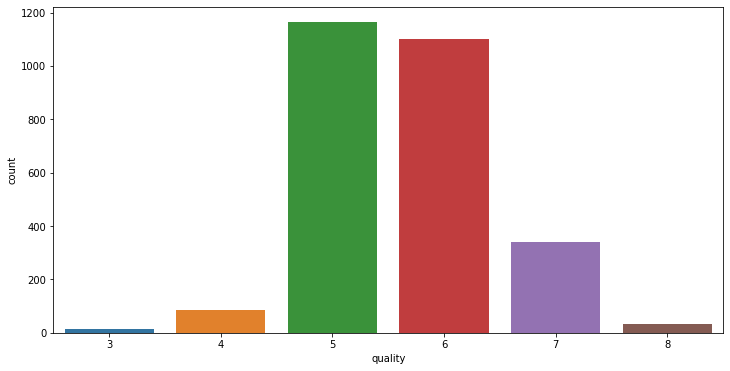

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(df['quality'])
plt.show()

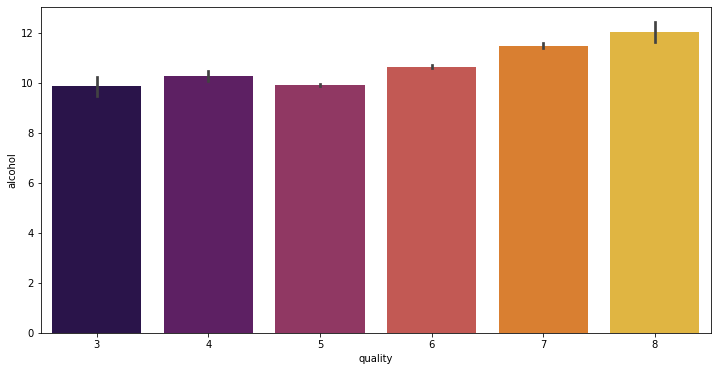

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df, palette = 'inferno')

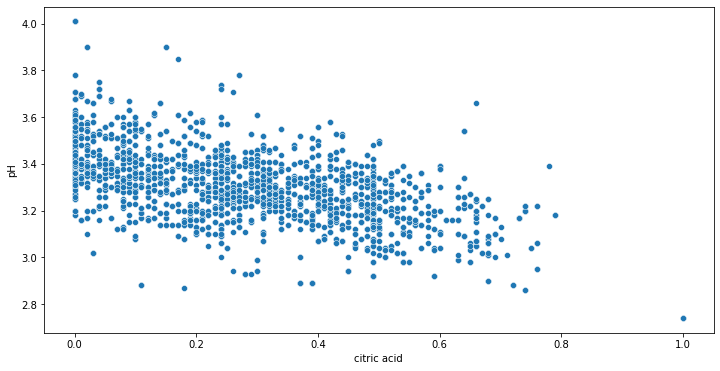

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()

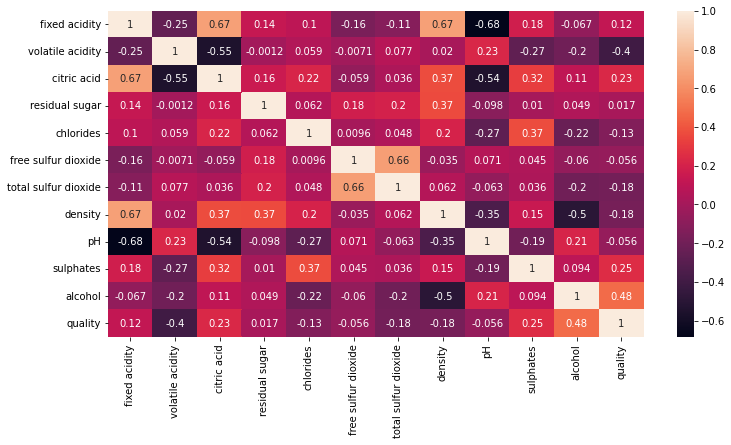

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True)

In [13]:
x = df.drop(['quality'],axis=1)
y=df['quality']

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
os = SMOTE()
x_res,y_res = os.fit_resample(x,y)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc= sc.fit_transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_sc, y_train)
pred = lr.predict(x_test_sc)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.5547602004294918

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_sc,y_train)

RandomForestClassifier()

In [21]:
accuracy_score(y_test,rf.predict(x_test_sc))

0.9463135289906943